# Orbit Plot

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-plots" data-toc-modified-id="Simple-plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple plots</a></span></li><li><span><a href="#Advanced-Plotting" data-toc-modified-id="Advanced-Plotting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Advanced Plotting</a></span></li></ul></div>

## Simple plots

REBOUND comes with a simple way to plot instantaneous orbits of planetary systems. To show how this works, let's setup a test simulation with 4 planets.

In [1]:
import rebound
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0.1, e=0.041, a=0.4, inc=0.2, f=0.43, Omega=0.82, omega=2.98)
sim.add(m=1e-3, e=0.24, a=1.0, pomega=2.14)
sim.add(m=1e-3, e=0.24, a=1.5, omega=1.14, l=2.1)
sim.add(a=-2.7, e=1.4, f=-1.5,omega=-0.7) # hyperbolic orbit

To plot these initial orbits in the $xy$-plane, we can simply call the `OrbitPlot` function and give it the simulation as an argument.

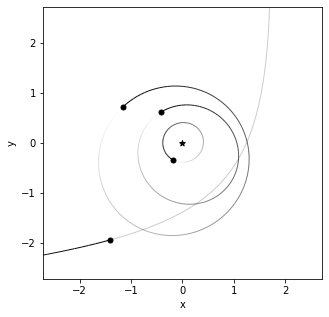

In [2]:
%matplotlib inline
fig = rebound.OrbitPlot(sim)

Note that the `OrbitPlot` function chooses reasonable limits for the axes for you. There are various ways to customize the plot. Have a look at the arguments used in the following examples, which are pretty much self-explanatory (if in doubt, check the documentation!). 

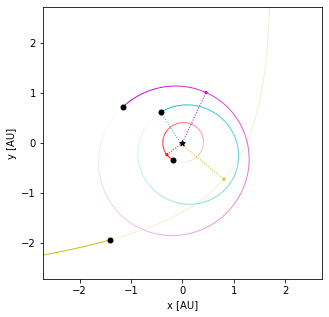

In [3]:
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True)

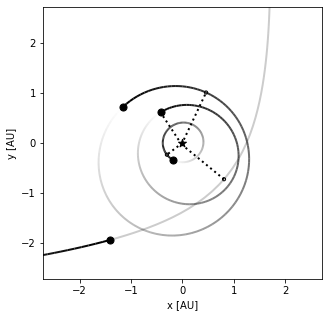

In [4]:
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", periastron=True, lw=2)

Note that all orbits are draw with respect to the center of mass of all interior particles. This coordinate system is known as Jacobi coordinates. It requires that the particles are sorted by ascending semi-major axis within the REBOUND simulation's particle array. 

From within iPython/Jupyter one can also call the OrbitPlot routine in a loop, thus making an animation as one steps through a simulation. This is a nice way of keeping track of what is going on in a simulation without having to wait until the end. To do that we need to import the `display` and `clear_output` function from iPython first. We'll also need access to the `clear` function of matplotlib. Then, we run a loop, updating the figure as we go along.

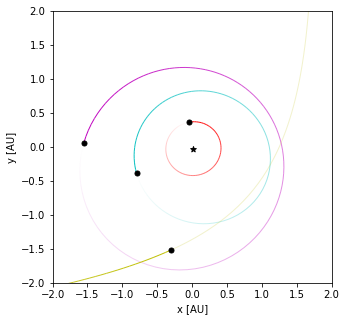

In [5]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
sim.move_to_com()
for i in range(3):
    sim.integrate(sim.t+0.31)
    fig = rebound.OrbitPlot(sim,color=True,unitlabel="[AU]",lim=2.)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

To get an idea of the three dimensional distribution of orbits, use the `slices=True` option. This will plot the orbits three times, from different perspectives. You can adjust the dimensions in the `z` direction using the `limz` keyword.

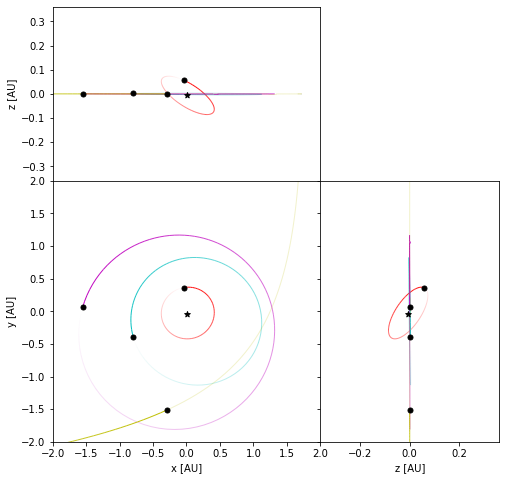

In [6]:
fig = rebound.OrbitPlot(sim,slices=True,color=True,unitlabel="[AU]",lim=2.,limz=0.36)

## Advanced Plotting

One important caveat to keep in mind is that `OrbitPlot` plots osculating Kepler orbits in Jacobi coordinates. This can lead to spurious plots in some general cases, e.g., when a particle is in orbit around a particle with non-zero index:

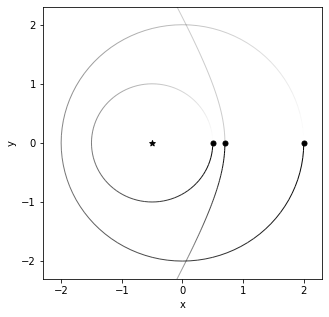

In [7]:
sim = rebound.Simulation()
sim.add(m=1.) #Star A
sim.add(m=1., a=1.) #Star B
sim.add(a=2.) #Planet ABb
sim.add(a=0.2, primary=sim.particles[1]) #Bb, 
sim.move_to_com()
fig = rebound.OrbitPlot(sim)

Circumbinary Planet ABb is plotted correctly in orbit around the center of mass of A and B, but Bb's Jacobi orbit is also around the center of mass of the interior particles, which corresponds to a hyperbolic orbit. It's important to note that while the plot looks incorrect, IAS15 would correctly integrate their motions.

There's no way to generically assign specific primaries to particular particles, since this concept becomes ill defined near the boundaries of different bodies' Hill spheres bodies and particles could for example switch primaries in a given simulation. But it's straightforward to make custom plots since version 3.5.10:

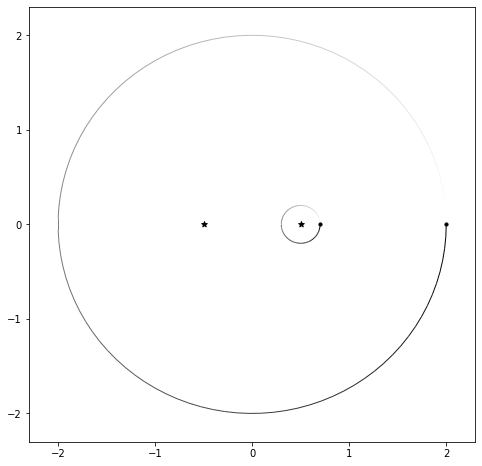

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8,8))
ps = sim.particles

# manually set plot boundaries
lim = 2.3 
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])

# plot the stars and planets with separate symbols
linewidth=1.

for star in ps[:2]:
    ax.scatter(star.x, star.y, s=35*linewidth, marker='*', facecolor='black', zorder=3)
    
for planet in ps[2:]:
    ax.scatter(planet.x, planet.y, s=10*linewidth, facecolor='black', zorder=3)
   
# Now individually plot orbit trails with appropriate orbit

from rebound.plotting import fading_line

ABb = ps[2] # circumbinary planet, use default jacobi coordinates
o = np.array(ABb.sample_orbit())
lc = fading_line(o[:,0], o[:,1], linewidth=linewidth)
ax.add_collection(lc)

Bb = ps[3] # planet in orbit around B, assign it as primary
o = np.array(Bb.sample_orbit(primary=ps[1]))
lc = fading_line(o[:,0], o[:,1], linewidth=linewidth)
ax.add_collection(lc)